## New Algorithm calculating Ward from the distance values

In [10]:
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
from nn_chain_algorithm_standard import standard_nn_chain

from knn_chain import knn_pdist, knn_chain

import numpy as np

import pstats, cProfile
import pyximport
pyximport.install()

(None, <pyximport._pyximport3.PyxImportMetaFinder at 0x1ef8aadf1c0>)

In [17]:
X = np.random.randint(0, 10, size=(500, 3))

### New knn-chain algorithm

In [18]:
distance_cache = knn_pdist(X)
A = knn_chain(distance_cache = distance_cache, n = len(X), k = 3)

### Standard Python implementation of SciPy's nn-chain algorithm

In [19]:
y = pdist(X)
B = standard_nn_chain(y, len(X))

### Timing

1. knn-chain

In [20]:
for i in range(10):
    cProfile.runctx("knn_chain(distance_cache = distance_cache, n = len(X), k = 3)", globals(), locals(), "Profile.prof")

In [21]:
s = pstats.Stats("Profile.prof")
s.strip_dirs().sort_stats("time").print_stats()

Wed Jun 19 10:17:37 2024    Profile.prof

         2729415 function calls (2728419 primitive calls) in 2.433 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   509836    0.386    0.000    0.805    0.000 knn_chain.py:8(_make_key)
     1029    0.368    0.000    1.544    0.002 knn_chain.py:70(get_top_k)
   259683    0.268    0.000    0.858    0.000 knn_chain.py:18(get_distance)
   250153    0.261    0.000    0.646    0.000 knn_chain.py:22(exists)
   509836    0.217    0.000    0.217    0.000 {built-in method builtins.min}
   509836    0.203    0.000    0.203    0.000 {built-in method builtins.max}
     1495    0.173    0.000    0.818    0.001 knn_chain.py:115(update_distance_cache)
   259683    0.169    0.000    0.169    0.000 {method 'get' of 'dict' objects}
    12225    0.058    0.000    0.125    0.000 fromnumeric.py:38(_wrapit)
   262221    0.047    0.000    0.047    0.000 {built-in method builtins.len}
    12070    0.034  

2. nn-chain

In [22]:
for i in range(10):
    cProfile.runctx("standard_nn_chain(y, len(X))", globals(), locals(), "Profile.prof")

In [23]:
t = pstats.Stats("Profile.prof")
t.strip_dirs().sort_stats("time").print_stats()

Wed Jun 19 10:18:20 2024    Profile.prof

         809061 function calls in 3.865 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   683287    1.744    0.000    1.744    0.000 nn_chain_algorithm_standard.py:49(condensed_index)
        1    1.161    1.161    3.865    3.865 nn_chain_algorithm_standard.py:61(standard_nn_chain)
   124251    0.956    0.000    0.956    0.000 nn_chain_algorithm_standard.py:45(new_dist)
        1    0.001    0.001    0.003    0.003 nn_chain_algorithm_standard.py:32(label)
      998    0.001    0.000    0.001    0.000 nn_chain_algorithm_standard.py:21(find)
      499    0.001    0.000    0.001    0.000 nn_chain_algorithm_standard.py:13(merge)
        1    0.000    0.000    3.865    3.865 {built-in method builtins.exec}
        3    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.000    0.000 {method 'argsort' o

### Dendrograms

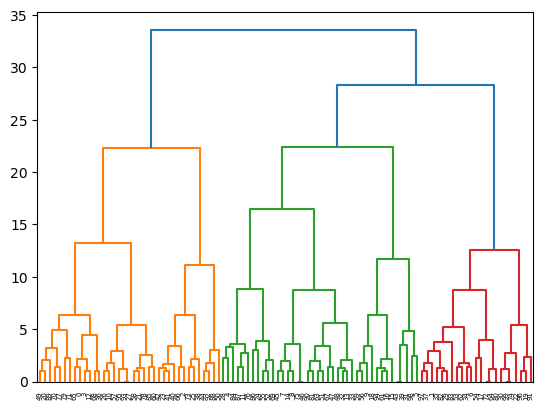

In [8]:
dendrogram(A);

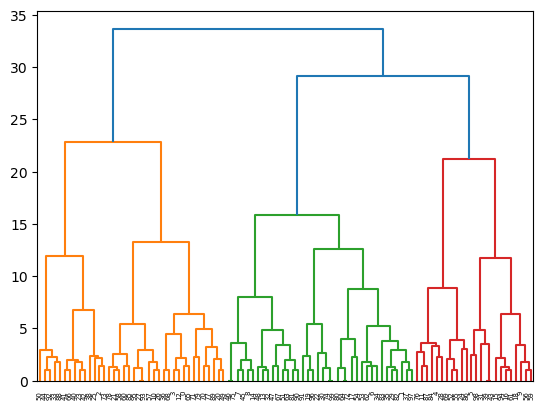

In [9]:
dendrogram(B);